In [1]:
# Data for non linear measurements
import numpy as np
%load nonlin_meas_data.py

In [2]:
n = 4
m = 300
sigma = 1.000000e-01
alpha = 0.040
beta = 1.000

In [3]:
row = np.zeros((1,m))
col = np.zeros((1,m-1))

In [4]:
np.put(row,0,-1)
np.put(row,1,1)
np.put(col,0,-1)

In [6]:
from scipy.linalg import toeplitz
B = toeplitz(col, row)

In [7]:
B.shape

(299, 300)

In [8]:
import cvxpy as cvx
x = cvx.Variable(n)
z = cvx.Variable(m)
H_alpha = 1/alpha*np.dot(B,y)
H_beta = 1/beta*np.dot(B,y)
constraints = [H_beta<=B*z, B*z<=H_alpha]
cvx.Problem(cvx.Minimize(cvx.norm(z-A*x)), constraints).solve()
print(x.value)

[[ 0.48194427]
 [-0.46569465]
 [ 0.9364119 ]
 [ 0.92966369]]


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

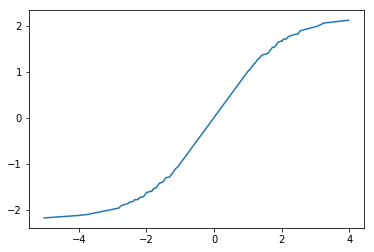

In [10]:
plt.plot(z.value, y)

In [11]:
W = np.dot(A,x.value).tolist()

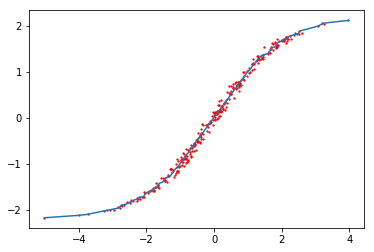

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(W, y, s=6, c='r', marker = '.')
ax1.plot(z.value, y)